In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import yaml
import os
os.chdir("../")
from datasets.CrossDomain import CrossDomain


In [10]:
with open("/home/topkech/work/pytorch-superpoint/configs/cross_domain_train.yaml", "r") as f:
    config = yaml.safe_load(f)


load labels from:  logs/trash/predictions/train
dict_keys(['image', 'image_cross_domain', 'name', 'points', 'valid_mask', 'labels_2D', 'labels_res', 'warped_labels_gaussian', 'warped_labels_bi', 'warped_img', 'warped_labels', 'warped_res', 'warped_valid_mask', 'homographies', 'inv_homographies', 'labels_2D_gaussian'])


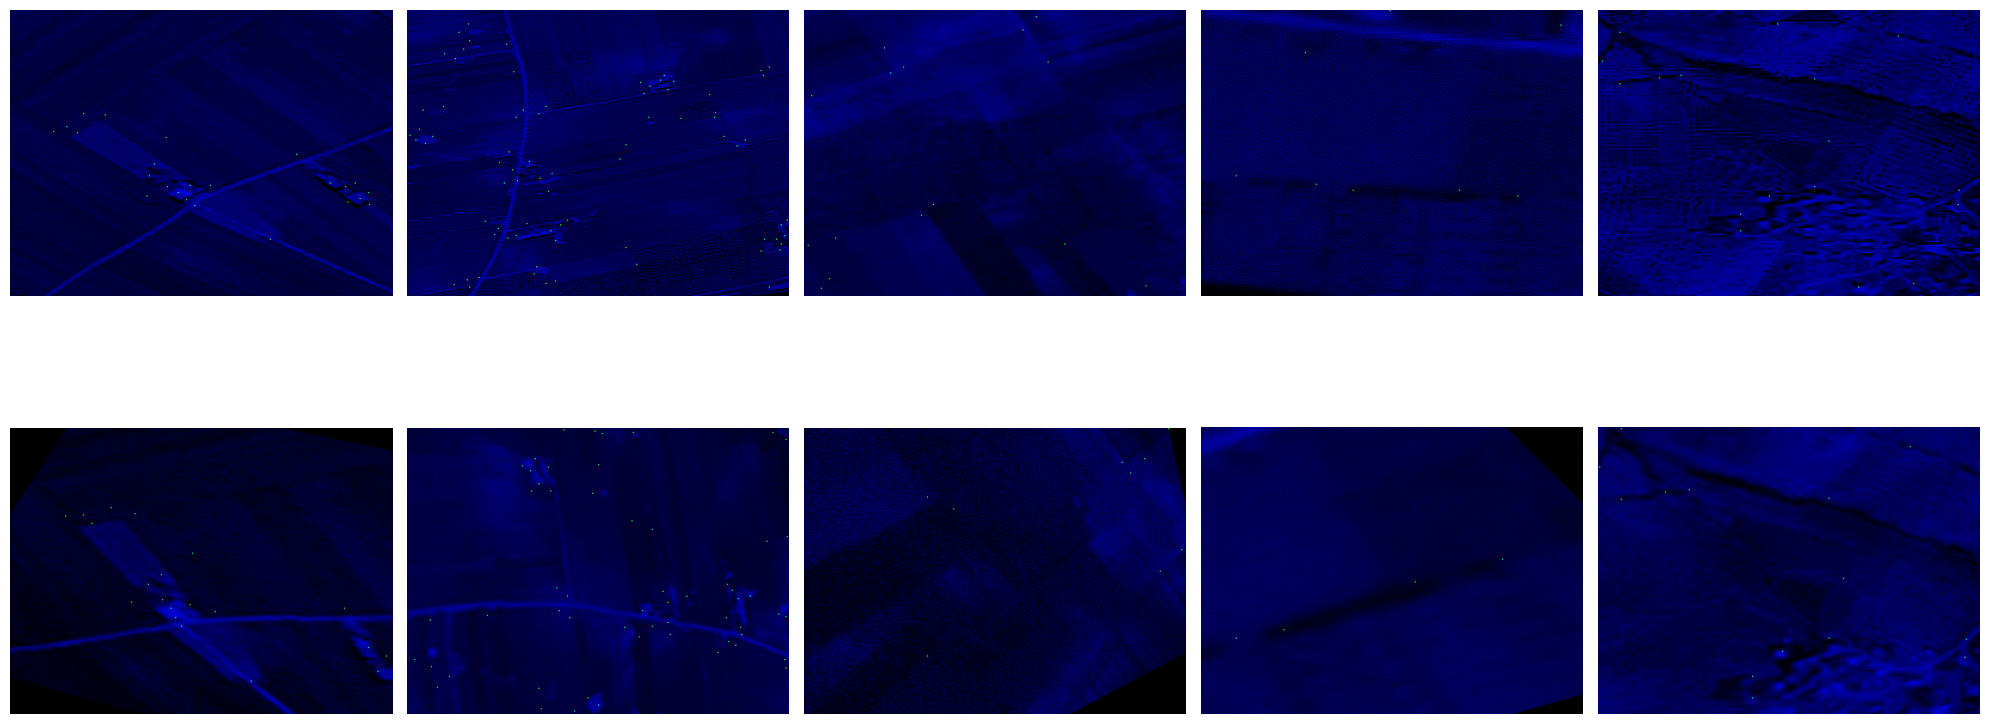

In [22]:
cd = CrossDomain(task="train", **config["data"])
print(cd[0].keys())
fig, axs = plt.subplots(2, 5, figsize=(20,10))
for i in range(5):
    ex = cd[i]
    im = ex["image"][0][...,np.newaxis]
    im = np.dstack([np.zeros_like(im), ex["labels_2D"][0][...,np.newaxis], im])

    axs[0][i].imshow(im)
    warped_im = ex["warped_img"][0][...,np.newaxis]
    warped_im = np.dstack([np.zeros_like(warped_im), ex["warped_labels"][0][...,np.newaxis], warped_im])
    axs[1][i].imshow(warped_im)
    axs[0][i].set_axis_off()
    axs[1][i].set_axis_off()
plt.tight_layout()


In [5]:
cd = CrossDomain(task="train", **config["data"])
print(cd[5]["image"].shape)
print(cd[5]["warped_img"].shape)
# for i in range(10):
#     print(cd[i])


load labels from:  logs/export_magicpoint_crossdomain/predictions/train
torch.Size([1, 240, 320])
torch.Size([1, 240, 320])


/home/topkech/mambaforge/envs/spsg/lib/python3.8/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


load labels from:  logs/export_magicpoint_crossdomain/predictions/train


ValueError: too many values to unpack (expected 2)

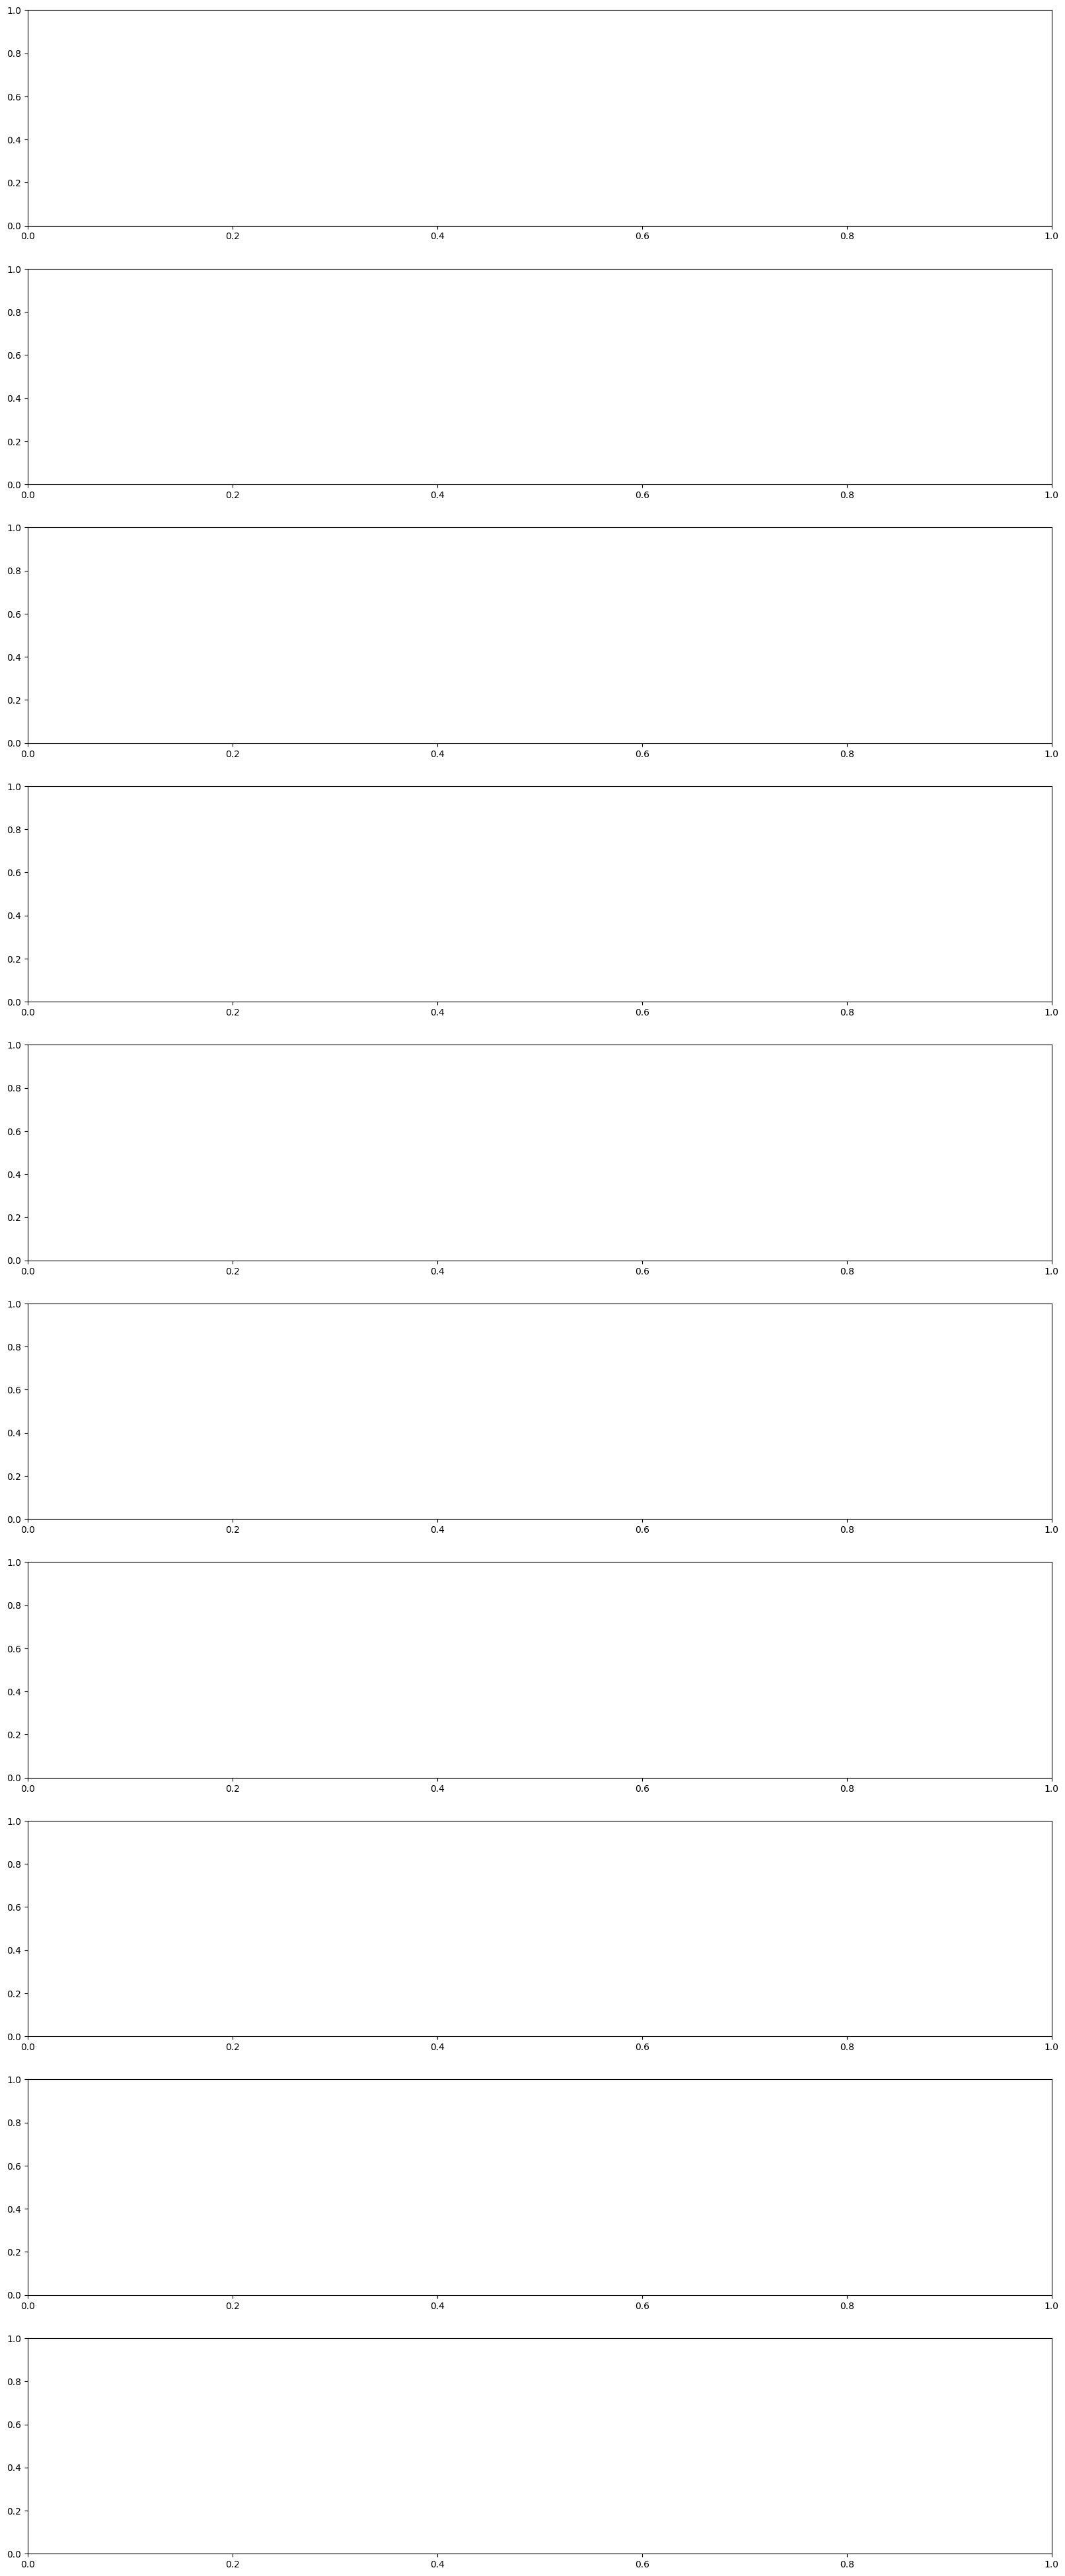

In [4]:
cd = CrossDomain(task="train", **config["data"])
fig, axs = plt.subplots(10, figsize=(20,50))
for i in range(10):
    im, pts = cd[i]
    axs[i].imshow(im)
    axs[i].scatter(pts[:,0], pts[:,1], s=0.2)
    axs[i].set_axis_off()
    axs[i].set_axis_off()
